# Библиотеки

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import calinski_harabasz_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import cluster

from scipy.cluster import hierarchy

from sklearn_extra.cluster import CLARA

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

# Задание 1

Разбейте множество объектов из набора данных pluton в пакете «cluster» на 3 кластера методом центров тяжести (kmeans). Сравните качество разбиения в зависимости от максимального числа итераций алгоритма.

In [2]:
pluton = pd.read_csv('pluton.csv')
pluton.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


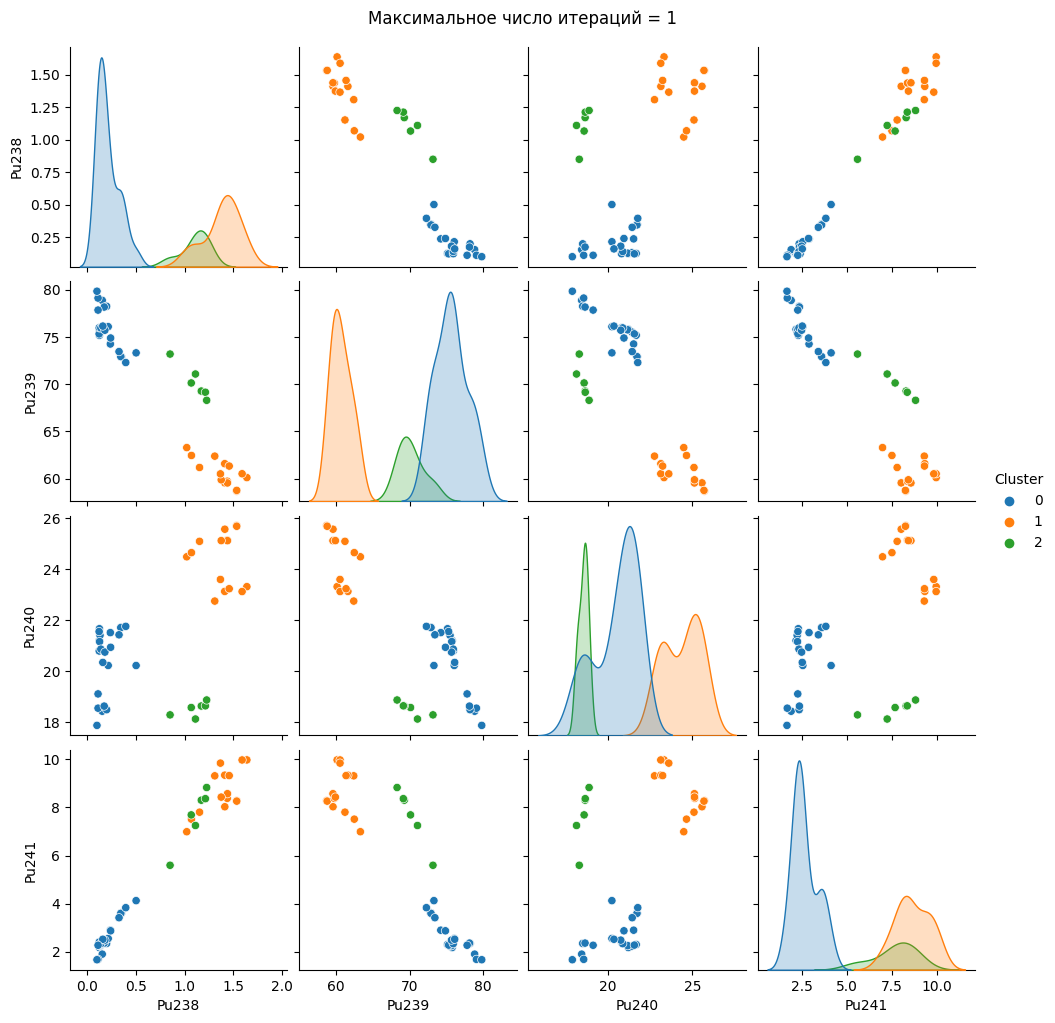

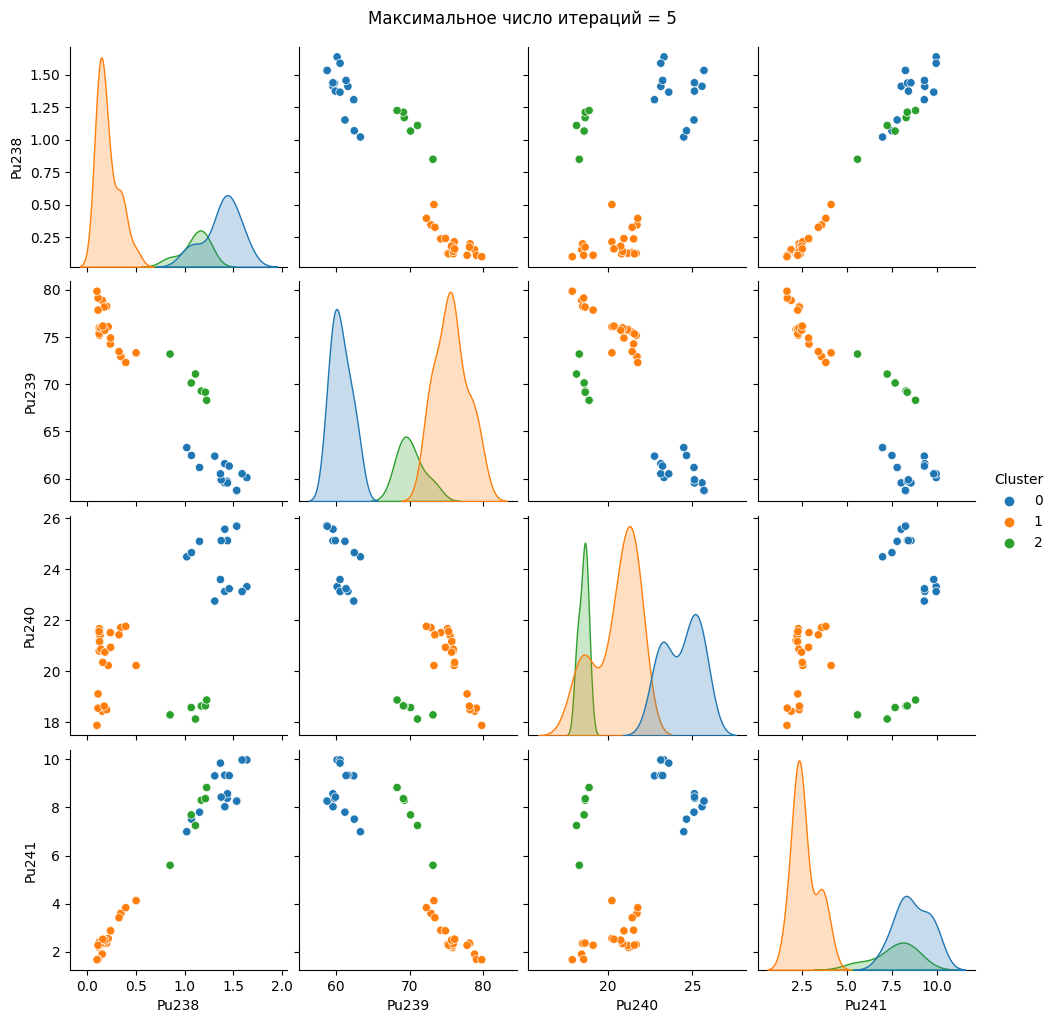

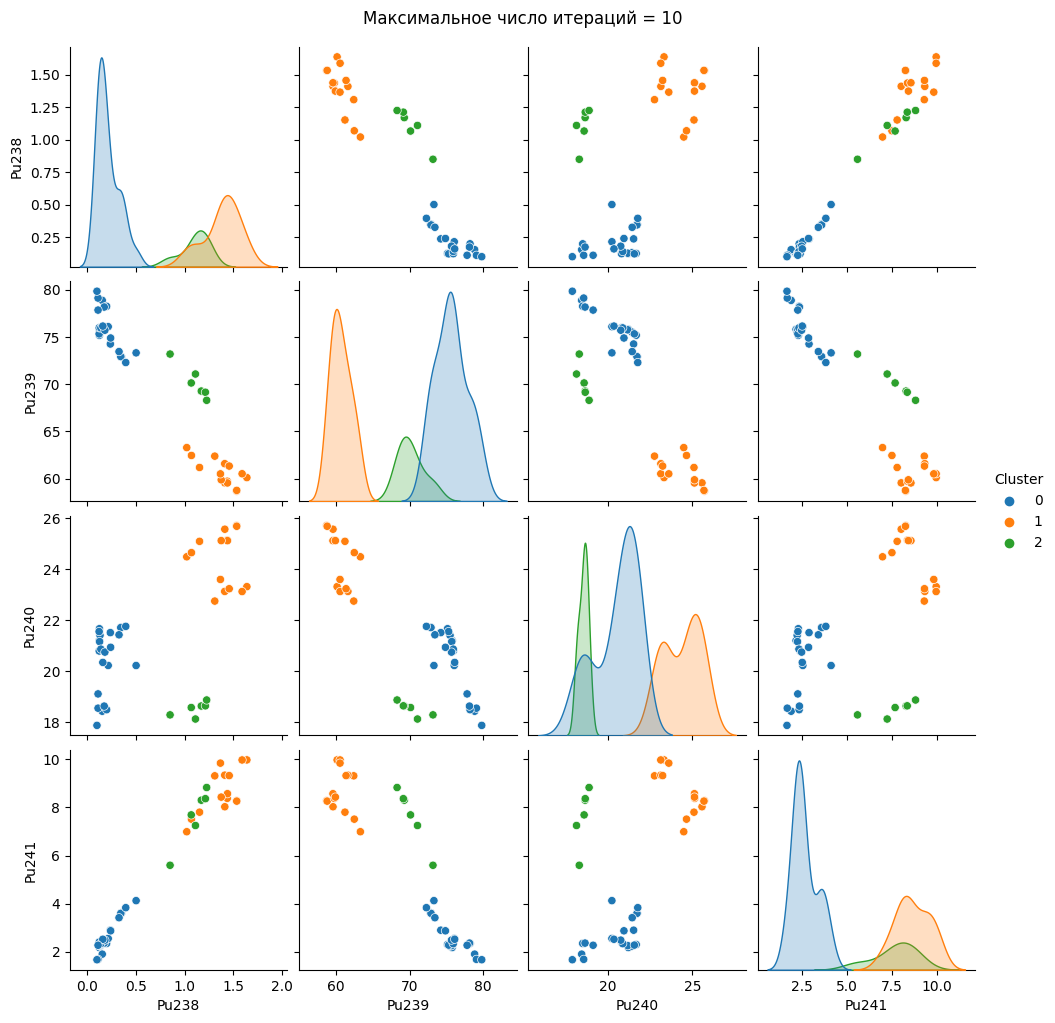

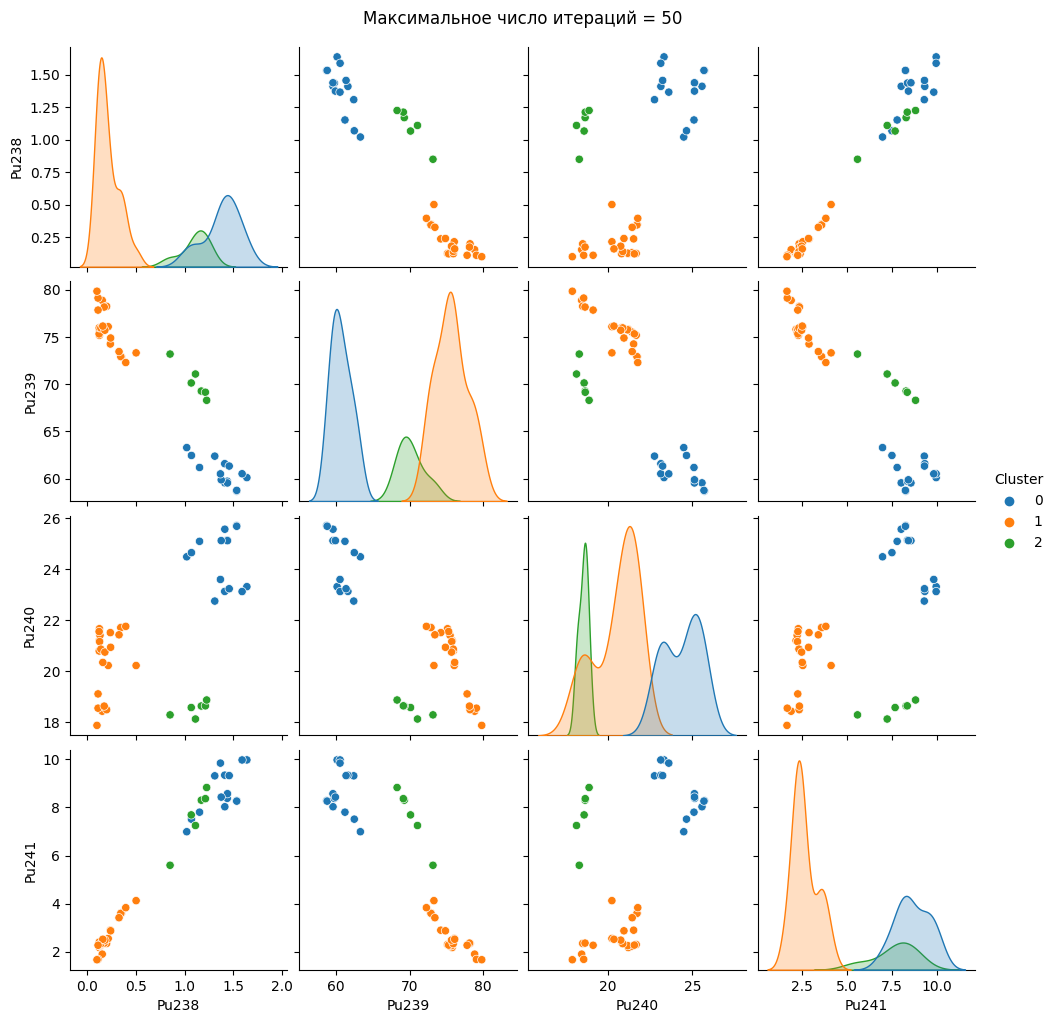

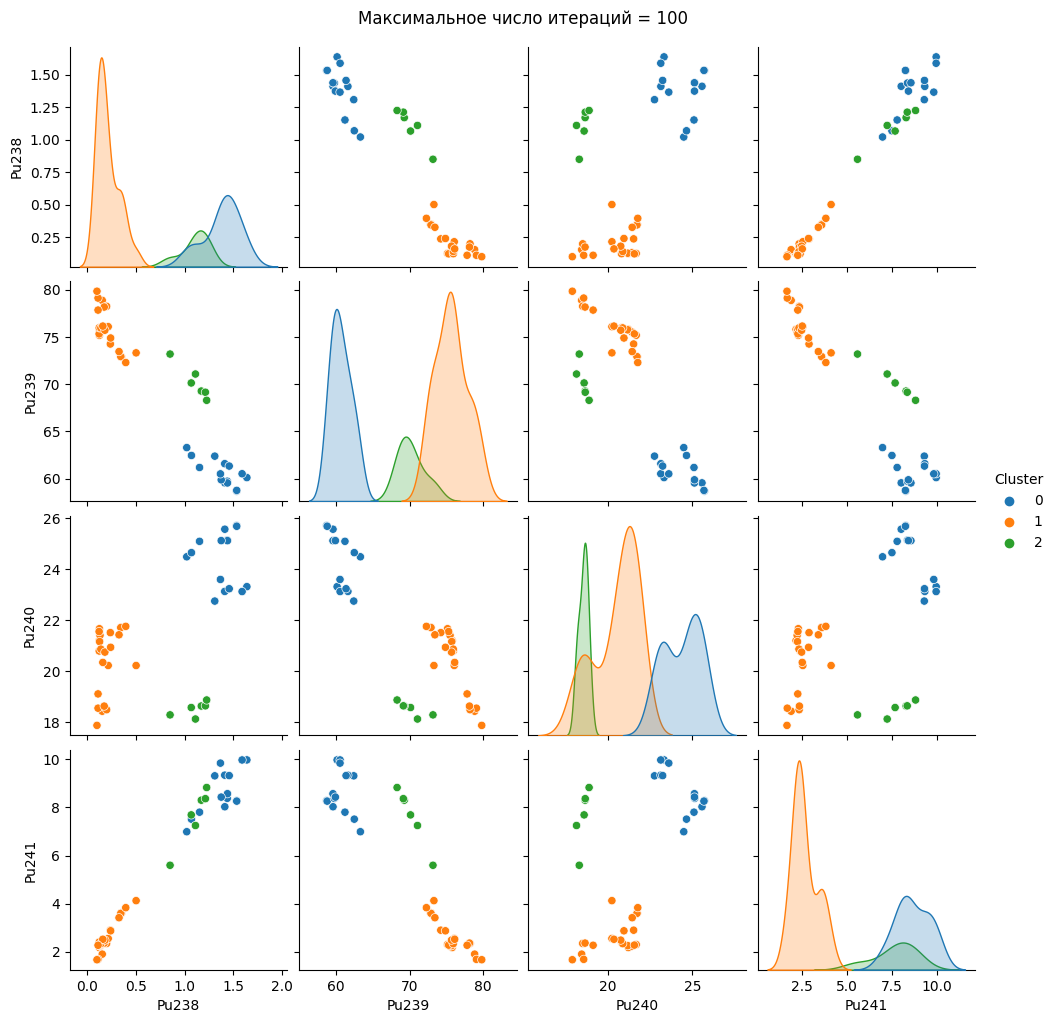

In [3]:
max_iters = [1, 5, 10, 50, 100]
color_palette = sns.color_palette("tab10")

for iter in max_iters:
    model = cluster.KMeans(n_clusters=3, max_iter=iter)
    model.fit(pluton)
    
    pluton['Cluster'] = model.labels_

    sns.pairplot(pluton, hue='Cluster', palette=color_palette)
    plt.suptitle(f'Максимальное число итераций = {iter}', y=1.02)
    plt.show()

Calinski-Harabasz Index (Variance Ratio Criterion) - измеряет отношение между дисперсией внутри кластеров и дисперсией между кластерами. Большие значения указывают на более качественные кластеры.

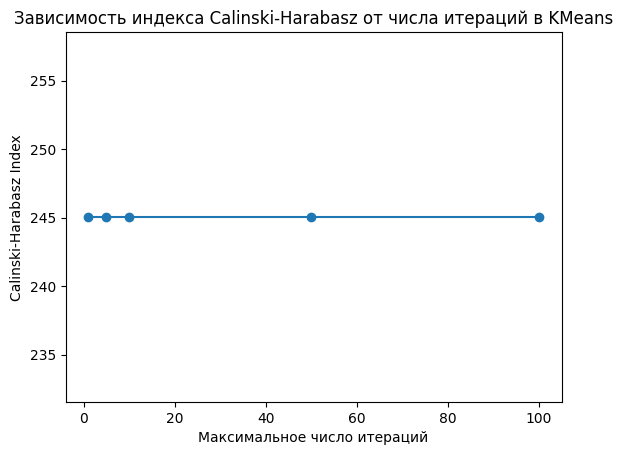

In [4]:
max_iters = [1, 5, 10, 50, 100]
calinski_harabasz_scores = []

for iter in max_iters:
    model = cluster.KMeans(n_clusters=3, max_iter=iter, random_state=42)
    model.fit(pluton)
    
    calinski_harabasz_scores.append(calinski_harabasz_score(pluton, model.labels_))

plt.plot(max_iters, calinski_harabasz_scores, marker='o')
plt.xlabel('Максимальное число итераций')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Зависимость индекса Calinski-Harabasz от числа итераций в KMeans')
plt.show()


Видим, что хорошее качество кластеризации достигается с 1 итерации и дальше не меняется. Следовательно, для этого набора данных достаточно одной итерации. 

# Задание 2

Сгенерируйте набор данных в двумерном пространстве, состоящий из 3 кластеров, каждый из которых сильно “вытянут” вдоль одной из осей. Исследуйте качество кластеризации методом clara в зависимости от 1) использования стандартизации; 2) типа метрики. Объясните полученные результаты.

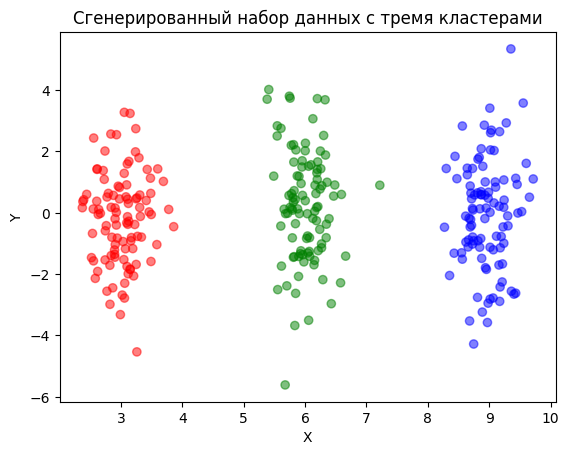

In [24]:
np.random.seed(42)
num_samples = 100
cluster1_params = {'mean': [3, 0], 'cov': [[0.1, 0], [0, 3]]}
cluster2_params = {'mean': [6, 0], 'cov': [[0.1, 0], [0, 3]]}
cluster3_params = {'mean': [9, 0], 'cov': [[0.1, 0], [0, 3]]}

cluster1 = np.random.multivariate_normal(**cluster1_params, size=num_samples)
cluster2 = np.random.multivariate_normal(**cluster2_params, size=num_samples)
cluster3 = np.random.multivariate_normal(**cluster3_params, size=num_samples)

data = np.vstack([cluster1, cluster2, cluster3])

labels = np.repeat([0, 1, 2], num_samples)
colors = {0: 'red', 1: 'green', 2: 'blue'}

plt.scatter(data[:, 0], data[:, 1], c=[colors[label] for label in labels], alpha=0.5)
plt.title('Сгенерированный набор данных с тремя кластерами')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

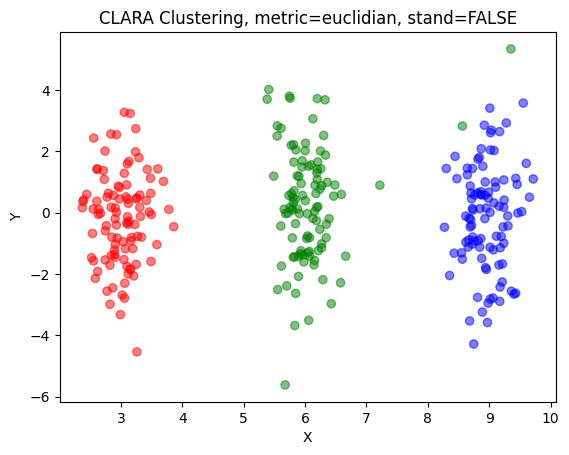

In [25]:
model = CLARA(n_clusters=3, metric='euclidean')
model.fit(data)

clusters = model.labels_
cmap = ListedColormap(['green', 'blue', 'red'])

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('CLARA Clustering, metric=euclidian, stand=FALSE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

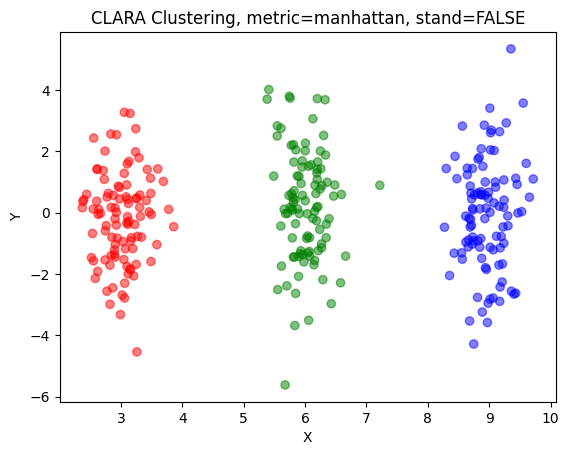

In [26]:
model = CLARA(n_clusters=3, metric='manhattan')
model.fit(data)
    
clusters = model.labels_
cmap = ListedColormap(['green', 'blue','red'])

plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('CLARA Clustering, metric=manhattan, stand=FALSE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

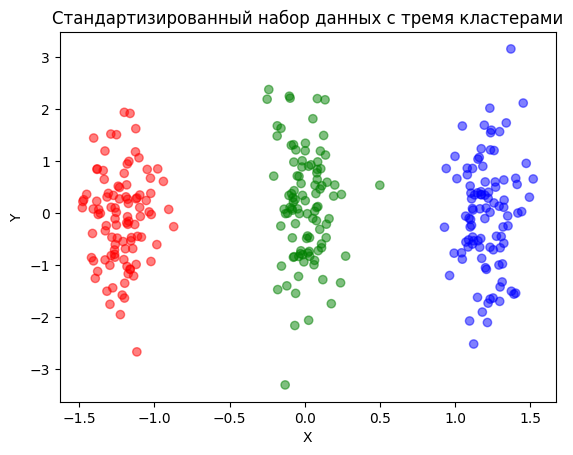

In [27]:
# Стандартизируем данные
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

standardized_data = (data - mean) / std

labels = np.repeat([1, 2, 3], num_samples)
colors = {1: 'red', 2: 'green', 3: 'blue'}

plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=[colors[label] for label in labels], alpha=0.5)
plt.title('Стандартизированный набор данных с тремя кластерами')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

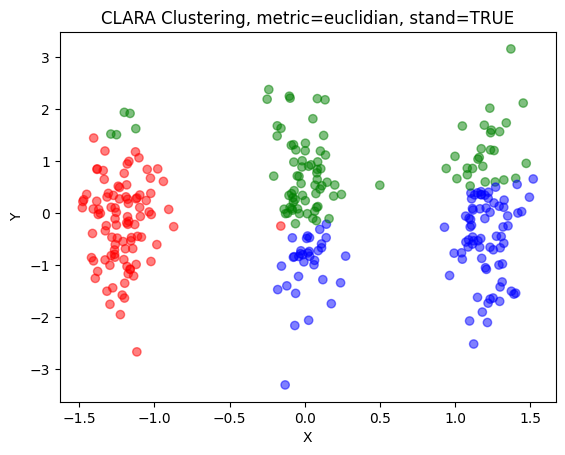

In [28]:
model = CLARA(n_clusters=3, metric='euclidean')
model.fit(standardized_data)
    
clusters = model.labels_
cmap = ListedColormap(['green', 'blue','red'])

plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('CLARA Clustering, metric=euclidian, stand=TRUE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

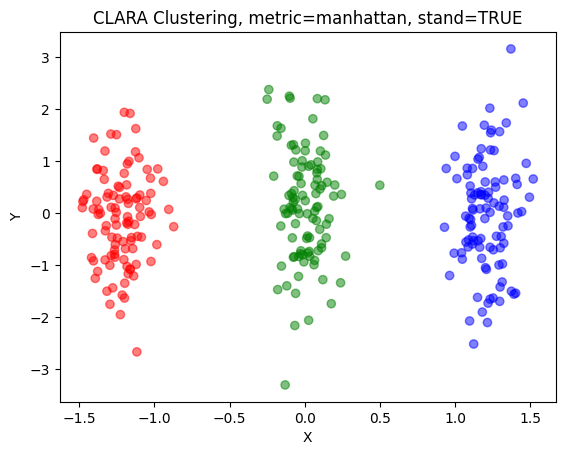

In [29]:
model = CLARA(n_clusters=3, metric='manhattan')
model.fit(standardized_data)
    
clusters = model.labels_
cmap = ListedColormap(['green', 'blue','red'])

plt.scatter(standardized_data[:, 0], standardized_data[:, 1], c=clusters, cmap=cmap, alpha=0.5)
plt.title('CLARA Clustering, metric=manhattan, stand=TRUE')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из полученных результатов видим, что наилучшим образом данные кластеризуются с Манхэттэновской метрикой при отсутствии стандартизации.

# Задание 3

Постройте дендрограмму для набора данных votes.repub в пакете «cluster» (число голосов, поданных за республиканцев на выборах с 1856 по 1976 год). Строки представляют 50 штатов, а столбцы -  годы выборов (31). Проинтерпретируйте полученный результат.

In [11]:
votes = pd.read_csv('votes.repub.csv')
votes.fillna(0, inplace=True)
votes.head()

,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,X1892,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,0.00,0.00,0.00,51.44,53.19,40.02,36.98,38.44,32.28,3.95,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,50.94,34.1,45.3,58.1,62.91
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,0.00,0.00,0.00,53.73,52.17,39.88,39.55,40.50,38.07,32.01,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,43.76,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89


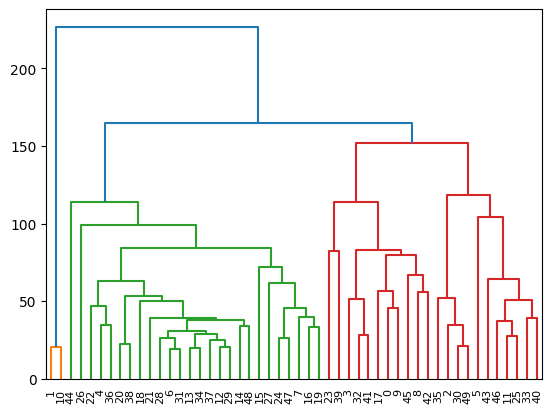

In [12]:
Z = hierarchy.linkage(votes, method='average')
plt.figure()
dn = hierarchy.dendrogram(Z)

Реализация на R:

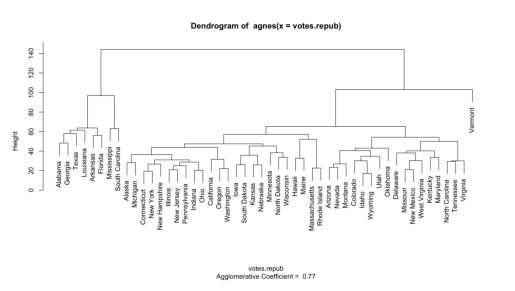

In [13]:
image_path = 'task3.png'

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()

Из полученных дендограмм видим, что данные разделяются на 2 кластера: в один из кластеров попали штаты, где среднее число голосов не очень велико.

# Задание 4

Постройте дендрограмму для набора данных animals в пакете «cluster». Данные содержат 6 двоичных признаков для 20 животных. Переменные - [ , 1] war теплокровные; [ , 2] fly летающие; [ , 3] ver позвоночные; [ , 4] end вымирающие; [ , 5] gro живущие в группе; [ , 6] hai имеющие волосяной покров. Проинтерпретируйте полученный результат.

In [14]:
animals = pd.read_csv('animals.csv')
animals.fillna(0, inplace=True)
animals.head()

,war,fly,ver,end,gro,hai
0,1,1,1,1.0,2.0,1
1,1,2,1,1.0,2.0,2
2,2,1,2,1.0,1.0,2
3,1,1,1,1.0,1.0,2
4,2,1,2,2.0,2.0,2


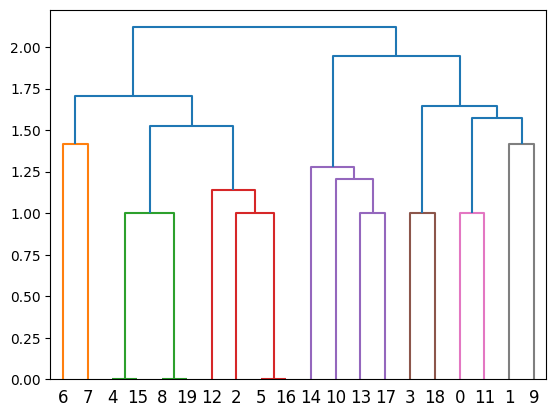

In [15]:
Z = hierarchy.linkage(animals, method='average')
plt.figure()
dn = hierarchy.dendrogram(Z)

Реализация на R:

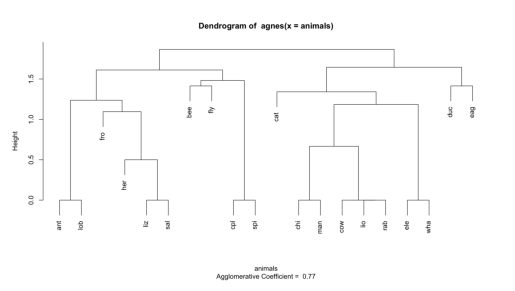

In [16]:
image_path = 'task4.png'

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()

Здесь данные также разделились на 2 больших кластера: в первый кластер попали не теплокровные животные, во второй - теплокровные. Также по кластерам распределились животные с наиболее схожими признаками.

# Задание 5

Рассмотрите данные из файла seeds_dataset.txt, который содержит описание зерен трех сортов пшеницы: Kama, Rosa and Canadian. Признаки: 1. область A, 2. периметр P, 3. компактность C = 4*pi*A/P^2, 4. длина зерна, 5. ширина зерна, 6. коэффициент ассиметрии, 7. длина колоска.

In [17]:
seeds_columns = ["Area", "Perimeter", "Compactness", "Length of Kernel", "Width of Kernel", "Asymmetry Coefficient", "Length of Kernel Groove", "Class"]
seeds = pd.read_csv("seeds_dataset.txt", delimiter="\t", names=seeds_columns)
seeds.drop(columns=["Class"], inplace=True)

seeds.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


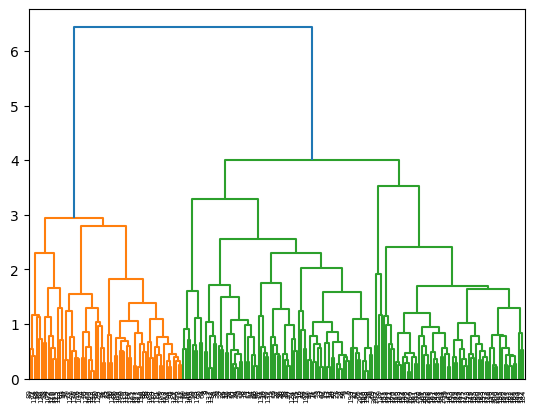

In [21]:
Z = hierarchy.linkage(seeds, method='average')
plt.figure()
dn = hierarchy.dendrogram(Z)

Реализация на R:

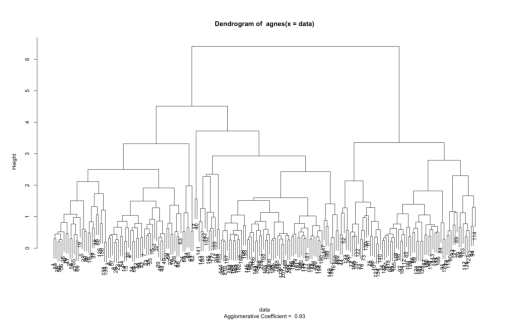

In [19]:
image_path = 'task5.png'

img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off') 
plt.show()

Из полученных дендограмм видим, что данные разделились на 3 кластера - три сорта пшеницы: Kama, Rosa and Canadian.